# Teoria das filas

Análise de um sistema de filas M/M/1

(Baseado no livro Modeling Random Systems - J. R. Cogdell - Seção 5.3 pg 500)

In [73]:
"""
@author: albert
IQuanta - DEE - UFCG
Data: março 2022
Versão: 1.0
"""

import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import math

## Tempo entre chegadas

Nesse modelo os clientes chegam de acordo com uma distribuição de Poisson, portanto o tempo entre chegadas de clientes tem uma distribuição exponencial

São geradas 10 variáveis aleatórias exponenciais com com taxa de chegada de $\lambda$ cliente/min.



In [74]:
Numero_clientes = 10
taxa_chegadas = 1
taxa_servico = 1.5

# tempo_entrechegadas = [0.854, 0.184, 3.22, 2.65, 1.59, 0.384, 0.993, 0.07, 2.33, 0.503]
tempo_entrechegadas = random.exponential(scale=(1/taxa_chegadas), size=(Numero_clientes))
print('Tempo entre chegadas = ', tempo_entrechegadas)

Tempo entre chegadas =  [2.51038428 0.21595868 0.7222609  4.77453815 0.07953103 0.98962632
 1.09875143 1.86171601 3.82371527 0.22723385]


O primeiro cliente chega no tempo

In [75]:
print(tempo_entrechegadas[0], ' min')

2.5103842762851385  min


o segundo cliente 

In [76]:
print(tempo_entrechegadas[1], ' min')

0.21595867976471844  min


depois do primeiro, e assim por diante.

## Tempo de atendimento (serviço)

Os tempos de atendimento são modelados também por uma v.a. exponencial com uma taxa de $\lambda_S$ clientes/min

In [77]:
# tempo_servico = [1.46, 0.442, 0.282, 0.969, 0.486, 0.57, 0.657, 1.32, 0.0195, 0.71]
tempo_servico = random.exponential(scale=(1/taxa_servico), size=(Numero_clientes))
print('Tempo de atendimento = ', tempo_servico)

Tempo de atendimento =  [0.35121506 0.66189543 0.08339561 1.19550668 0.27089706 0.78764656
 1.7943742  1.4502548  0.67444416 1.98790976]


Ou seja o primeiro cliente levou

In [78]:
print(tempo_servico[0], ' min')

0.3512150566939792  min


sendo atendido, o segundo cliente levou

In [79]:
print(tempo_servico[1], ' min')

0.6618954344665483  min


sendo atendido e assim por diante.

## Tempo de chegada

O primeiro cliente chega ao sistema em

In [80]:
print(tempo_entrechegadas[0], ' min')

2.5103842762851385  min


o segundo cliente chega ao sistema em

In [81]:
print(tempo_entrechegadas[0] + tempo_entrechegadas[1], ' min')

2.726342956049857  min


e assim por diante.

Tempo de chegada  [2.5103842762851385, 2.726342956049857, 3.448603861022883, 8.223142009222649, 8.302673042447356, 9.292299361025671, 10.391050793982775, 12.252766808670446, 16.076482082237128, 16.303715929259678]


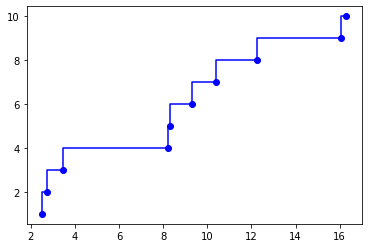

In [82]:
tempo_chegada = []
for k in range(Numero_clientes):
    tempo_chegada.append(0)
    
for i in range(Numero_clientes):
    if(i == 0):
        tempo_chegada[0] = tempo_entrechegadas[0]
    else:
        tempo_chegada[i] = tempo_chegada[i-1] + tempo_entrechegadas[i]

print('Tempo de chegada ', tempo_chegada)

cliente = list(range(1, Numero_clientes+1))
plt.step(tempo_chegada, cliente, 'bo-')
plt.show()

## Tempo de saída

O tempo de saída é calculado da seguinte forma:
- o primeiro cliente é imediatamente atendido e portanto o seu tempo de saída é tempo de chegada + tempo de atendimento
- se o segundo cliente chegar antes do primeiro ter saído o seu tempo de saída é o tempo de saída do primeiro cliente + o seu tempo de atendimento, caso contrário seu tempo de saída é o seu tempo de chegada + seu tempo de atendimento
- o mesmo procedimento para os seguintes 

Tempo de saida  [2.8615993329791176, 3.523494767445666, 3.6068903764733955, 9.418648685278091, 9.689545743894008, 10.477192300555277, 12.27156649569306, 13.721821291092088, 16.750926242875092, 18.738836003353075]


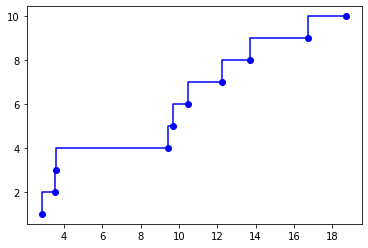

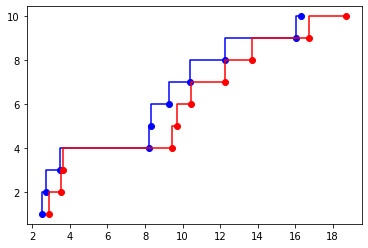

In [83]:
tempo_saida = []
for k in range(Numero_clientes):
    tempo_saida.append(0)
    
for i in range(Numero_clientes):
    if(i == 0):
        tempo_saida[0] = tempo_chegada[0] + tempo_servico[0]
    else:
        if(tempo_chegada[i] < tempo_saida[i-1]):
            tempo_saida[i] = tempo_saida[i-1] + tempo_servico[i]
        else:
            tempo_saida[i] = tempo_chegada[i] + tempo_servico[i]

print('Tempo de saida ', tempo_saida)

plt.step(tempo_saida, cliente, 'bo-')
plt.show()

plt.step(tempo_chegada, cliente, 'bo-')
plt.step(tempo_saida, cliente, 'ro-')

plt.show()

## Tempo na fila

O tempo na fila é calculado da seguinte forma:
- o primeiro cliente é imediatamente atendido, 
- se o segundo cliente chegar antes do primeiro terminar o seu tempo na fila será o tempo de saída do primeiro menos o seu tempo de chegada, caso contrário ele é imediatamente atendido
- e assim por diante

Tempo na fila  [0, 0.13525637692926074, 0.07489090642278295, 0, 1.115975642830735, 0.397246382868337, 0.08614150657250264, 0.018799687022614364, 0, 0.44721031361541463]


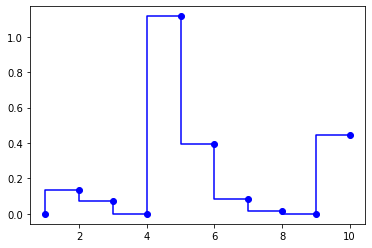

In [84]:
tempo_fila = []
for k in range(Numero_clientes):
    tempo_fila.append(0)
    
for i in range(Numero_clientes):
    if(i == 0):
        tempo_fila[0] = 0
    else:
        if(tempo_chegada[i] < tempo_saida[i-1]):
            tempo_fila[i] = tempo_saida[i-1] - tempo_chegada[i]
        else:
            tempo_fila[i] = 0

print('Tempo na fila ', tempo_fila)

plt.step( cliente, tempo_fila, 'bo-')
plt.show()

## Tempo do cliente no sistema

O tempo do cliente no sistema é a diferença entre seu tempo de chegada no sistema e o tempo de saída do sistema.

tempo do cliente no sistema [0.3512150566939791, 0.7971518113958092, 0.15828651545051242, 1.1955066760554427, 1.3868727014466522, 1.1848929395296057, 1.8805157017102854, 1.469054482421642, 0.6744441606379645, 2.4351200740933976]


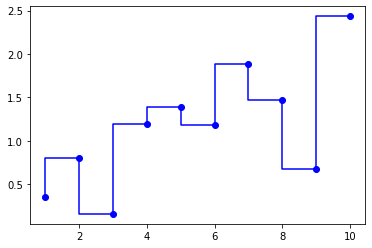

In [85]:
tempo_sistema = []
for k in range(Numero_clientes):
    tempo_sistema.append(0)
    
for i in range(Numero_clientes):
     tempo_sistema[i] = tempo_saida[i] - tempo_chegada[i]

print('tempo do cliente no sistema', tempo_sistema)

plt.step( cliente, tempo_sistema, 'bo-')
plt.show()

## Tempo médio estimado de clientes no sistema

O tempo médio estimado que os clientes passam no sistema é igual a soma dos tempos que cada cliente passa no sistema dividido pelo número de clientes

O tempo médio teórico é $ET = 1/(\lambda_s - \lambda)$

In [86]:
tempo_esperado_sistema = sum(tempo_sistema)/Numero_clientes
tempo_teorico_sistema = 1/(taxa_servico - taxa_chegadas)
print('Tempo médio estimado de clientes no sistema ', tempo_esperado_sistema, ' min')
print('Tempo médio teórico de clientes no sistema ', tempo_teorico_sistema, ' min')

Tempo médio estimado de clientes no sistema  1.153306011943529  min
Tempo médio teórico de clientes no sistema  2.0  min


# Número de clientes no sistema

O número de clientes no sistema pode ser calculado da seguinte forma
- conta, a partir do primeiro cliente, o número de clientes que chegam antes do primeiro cliente sair
- quando ele sai é contado -1
- conta o número de clientes que chegam, a partir da saída do primeiro cliente, até a saída do segundo 
- e assim por diante, até o último cliente sair


eventos ent/saída [2.5103842762851385, 2.726342956049857, 2.8615993329791176, 3.448603861022883, 3.523494767445666, 3.6068903764733955, 8.223142009222649, 8.302673042447356, 9.292299361025671, 9.418648685278091, 9.689545743894008, 10.391050793982775, 10.477192300555277, 12.252766808670446, 12.27156649569306, 13.721821291092088, 16.076482082237128, 16.303715929259678, 16.750926242875092, 0]
Clientes no sistema [1, 2, 1, 2, 1, 0, 1, 2, 3, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0]
1


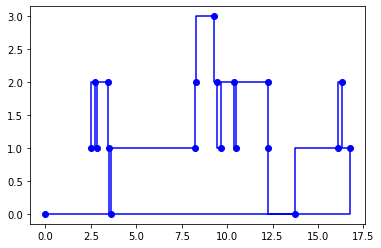

In [87]:
clientes_no_sistema = []
eventos_ES = [] # tempos de chegada e de saída ordenados

dobro = 2*Numero_clientes
for k in range(dobro):
    clientes_no_sistema.append(0)
    eventos_ES.append(0)

contador = 0
j = 0

for i in range(Numero_clientes):
    if(j < Numero_clientes):
        while((tempo_saida[i] > tempo_chegada[j])): # and (i < (Numero_clientes-1))):
            contador += 1 
            clientes_no_sistema[i+j] = contador
            eventos_ES[j+i] = tempo_chegada[j]
            j += 1
            if(j == Numero_clientes):
                break
        contador -=1
        clientes_no_sistema[i+j] = contador
        eventos_ES[j+i] = tempo_saida[i]

print('eventos ent/saída', eventos_ES)
print('Clientes no sistema', clientes_no_sistema)
print(contador)

plt.step(eventos_ES, clientes_no_sistema, '-bo')
plt.show()

## Estimativa da taxa de chegadas

$\hat{\lambda} =$ Numero de clientes/tempo de chegada do último cliente

taxa correta, (a que gerou os valores) $\lambda = 1$ cliente/min

In [88]:
lambda_estimado = Numero_clientes/tempo_chegada[Numero_clientes-1]

print('Taxa de chegadas estimada', lambda_estimado, ' clientes/min')

Taxa de chegadas estimada 0.6133571048090558  clientes/min


## Estimativa da taxa de atendimento (serviço)

$\hat{\lambda}_s =$ Numero de clientes/soma dos tempos de atendimento

taxa correta, (a que gerou os valores) $\lambda_s = 1,5$ cliente/min

In [89]:
lambda_s_estimado = Numero_clientes/sum(tempo_servico)

print('Taxa de atendimento estimada', lambda_s_estimado, ' clientes/min')

Taxa de atendimento estimada 1.0802006529501669  clientes/min


## Utilização do sistema estimada

Ou a probabilidade do atendente estar ocupado

$\hat{\rho} = \hat{\lambda}/\hat{\lambda}_s$

Valor correto $\rho = \lambda/\lambda_s = 1/1,5 = 0,6667$

In [90]:
rho_estimado = lambda_estimado/lambda_s_estimado
rho = taxa_chegadas/taxa_servico

print('Utilização do sistema estimada ', rho_estimado)
print('Utilização do sistema ', rho)

Utilização do sistema estimada  0.5678177504650629
Utilização do sistema  0.6666666666666666


## Número médio de clientes estimado no sistema

$E\hat{N} = \hat{\rho} / (1-\hat{\rho})$

O valor esperado do número de clientes no sistema é dado por

$EN = \rho / (1-\rho)$



In [91]:
EN_estimado =  rho_estimado / (1 - rho_estimado)
EN = rho / (1 - rho)

print('Número médio de clientes no sistema estimado ', EN_estimado)
print('Número médio de clientes no sistema ', EN)

Número médio de clientes no sistema estimado  1.3138386666182622
Número médio de clientes no sistema  1.9999999999999998
